# RETO 1
--- 
## 1. Importar librerías y datos

In [12]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [14]:
# Importar datos
df_sub = pd.read_csv("Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv", encoding='ISO-8859-1')
df_esc = pd.read_csv("Escalas_subterranea.csv", encoding='ISO-8859-1')

display(df_sub.head(), df_esc.head())

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


,CALIDAD DEL AGUA PARA COLIFORMES FECALES_subterraneas,CRITERIO,DESCRIPCION
0,Excelente,COLI_FEC menor a 1.1,Agua potable. Agua no contaminada o condicion ...
1,Buena calidad,COLI_FEC mayor o igual de 1.1 y menor o igual ...,Aguas para uso recreativo con contacto primari...
2,Aceptable,COLI_FEC mayor de 200 y menor o igual a 1000,Aguas con calidad admisible como fuente de aba...
3,Contaminada,COLI_FEC mayor de 1000 y menor o igual a 10000,Aguas con contaminacion bacteriologica. Indic...
4,Fuertemente contaminada,COLI_FEC mayor de 10000,Aguas con fuerte contaminacion bacteriologica....


---
## 2. Exploración de datos
### 2.1. Escala

In [15]:
# General info escala
df_esc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   CALIDAD DEL AGUA PARA COLIFORMES FECALES_subterraneas  66 non-null     object
 1   CRITERIO                                               66 non-null     object
 2   DESCRIPCION                                            66 non-null     object
dtypes: object(3)
memory usage: 1.7+ KB


In [16]:
# Valores únicos de Calidad
df_esc['CALIDAD DEL AGUA PARA COLIFORMES FECALES_subterraneas'].unique()

array(['Excelente', 'Buena calidad', 'Aceptable', 'Contaminada',
       'Fuertemente contaminada',
       'CALIDAD DEL AGUA PARA SOLIDOS DISUELTOS TOTALES-SALINIZACION',
       'Potable - Dulce', 'Ligeramente salobres', 'Salobres', 'Salinas',
       'CALIDAD DEL AGUA PARA SOLIDOS DISUELTOS TOTALES-RIEGO AGRICOLA',
       'Excelente para riego', 'Cultivos sensibles',
       'Cultivos con manejo especial', 'Cultivos tolerantes',
       'Indeseable para riego', 'CALIDAD DEL AGUA PARA CROMO',
       'Potable - Excelente', 'No apta como FAAP',
       'CALIDAD DEL AGUA PARA CONDUCTIVIDAD', 'Buena para riego',
       'Permisible para riego', 'Dudosa para riego',
       'CALIDAD DEL AGUA PARA CADMIO', 'Apta como FAAP',
       'CALIDAD DEL AGUA PARA ARSENICO',
       'CALIDAD DEL AGUA PARA ALCALINIDAD', 'Baja', 'Media', 'Alta',
       'Indeseable', 'Indeseable como FAAP',
       'CALIDAD DEL AGUA PARA PLOMO',
       'CALIDAD DEL AGUA PARA NITROGENO DE NITRATOS ',
       'Potable - Buena calidad

### 2.2. Datos de agua subterránea

In [17]:
# General info sub
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [18]:
# Basic descriptive statistics
# Quantitative
df_sub.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [19]:
# Qualitative
part1 = df_sub.iloc[:,0:26].describe(include = ['O'])
part2 = df_sub.iloc[:,26:46].describe(include = ['O'])
part3 = df_sub.iloc[:,46:].describe(include = ['O'])
display(part1,part2,part3)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,CALIDAD_ALC,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3
count,1068,1068,1068,1068,1068,1068,1068,1064,1062,1066,1066,1066,1068,1068,1067,1067,1068,1068,1067,1067
unique,1068,1066,13,32,452,273,8,4,5,925,5,4,862,4,889,4,125,5,995,3
top,DLAGU6,EL FUERTE,CUENCAS CENTRALES DEL NORTE,DURANGO,LA PAZ,PENINSULA DE YUCATAN,POZO,Alta,Permisible para riego,496,Excelente para riego,Potable - Dulce,<0.2,Baja,<20,Potable - Dura,<1.1,Potable - Excelente,<0.02,Potable - Excelente
freq,1,2,232,121,27,119,1039,794,460,4,491,834,162,434,26,577,737,739,65,788


,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin
count,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,634,1068,1068,1068,1068
unique,209,3,3,2,168,2,61,2,31,2,362,3,615,2,3,126,3,3,3,3
top,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI
freq,815,816,1066,1066,854,1053,968,1067,1038,1056,545,982,401,932,434,78,1005,939,995,995


,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
unique,2,3,2,3,2,2,2,2,2,2,2
top,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
freq,876,841,1007,985,941,1066,1053,1067,1056,982,932


In [73]:
# Columnas potenciales a entrar en el modelado de K-Means
pot_cols = ['ESTADO','SUBTIPO','SEMAFORO','CUMPLE_CON_ALC',
            'CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin',
            'CUMPLE_CON_FLUO','CUMPLE_CON_DUR','CUMPLE_CON_CF','CUMPLE_CON_NO3',
            'CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG', 
            'CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']

for col in pot_cols:
  print(f"{col}({len(df_sub[col].unique())}): {df_sub[col].unique()}\n")

ESTADO(32): ['AGUASCALIENTES' 'BAJA CALIFORNIA SUR' 'CAMPECHE' 'CHIHUAHUA'
 'COAHUILA DE ZARAGOZA' 'COLIMA' 'DURANGO' 'MEXICO' 'GUANAJUATO'
 'GUERRERO' 'HIDALGO' 'MICHOACAN DE OCAMPO' 'NAYARIT' 'PUEBLA'
 'QUERETARO ARTEAGA' 'QUINTANA ROO' 'SAN LUIS POTOSI' 'TABASCO' 'TLAXCALA'
 'ZACATECAS' 'DISTRITO FEDERAL' 'MORELOS' 'OAXACA' 'CHIAPAS'
 'VERACRUZ DE IGNACIO DE LA LLAVE' 'TAMAULIPAS' 'JALISCO' 'SONORA'
 'BAJA CALIFORNIA' 'SINALOA' 'YUCATAN' 'NUEVO LEON']

SUBTIPO(8): ['POZO' 'MANANTIAL' 'NORIA' 'POZO NORIA' 'DESCARGA' 'Pozo' 'CENOTE'
 'BOMBEO CENOTE']

SEMAFORO(3): ['Verde' 'Rojo' 'Amarillo']

CUMPLE_CON_ALC(3): ['SI' 'NO' 'ND']

CUMPLE_CON_COND(3): ['SI' 'NO' 'ND']

CUMPLE_CON_SDT_ra(3): ['SI' 'NO' 'ND']

CUMPLE_CON_SDT_salin(3): ['SI' 'NO' 'ND']

CUMPLE_CON_FLUO(2): ['SI' 'NO']

CUMPLE_CON_DUR(3): ['SI' 'NO' 'ND']

CUMPLE_CON_CF(2): ['SI' 'NO']

CUMPLE_CON_NO3(3): ['SI' 'NO' 'ND']

CUMPLE_CON_AS(2): ['SI' 'NO']

CUMPLE_CON_CD(2): ['SI' 'NO']

CUMPLE_CON_CR(2): ['SI' 'NO']

CUMPLE_CON

**Observaciones**

Para el análisis de correlaciones *Calidad de agua* vs *Ubicación*, solo se requieren las siguientes columnas:

['ESTADO','SUBTIPO','LONGITUD','LATITUD','SEMAFORO','CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin','CUMPLE_CON_FLUO','CUMPLE_CON_DUR','CUMPLE_CON_CF','CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG', 'CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']

Estas variables no poseen datos nulos por lo cual solo se procede a codificarlas. 
Al ser variables categóricas, se debe proceder a cuantificarlas

--- 
## 3. Limpieza y transformación
(Sólo a variables relevantes para el análisis de K-Means)

In [78]:
# Nuevo df
df_short = df_sub[pot_cols]
df_short.head()

,ESTADO,SUBTIPO,SEMAFORO,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,AGUASCALIENTES,POZO,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,AGUASCALIENTES,POZO,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,AGUASCALIENTES,POZO,Rojo,SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,AGUASCALIENTES,POZO,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,BAJA CALIFORNIA SUR,POZO,Rojo,SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [79]:
# Cuantificando columnas de Cumple_...
df_short.iloc[:,3:].replace(to_replace = ["SI","NO","ND"], 
                            value = [1,0,0], inplace = True)

# One hot encoding a columna Subtipo
df_short["SUBTIPO"].replace(to_replace = ["Pozo"], 
                            value = ["POZO"], inplace = True)
df_short = pd.get_dummies(data = df_short, columns = ["SUBTIPO"])

# Codificando columna de Semaforo
df_short['SEMAFORO'].replace(to_replace = ['Verde','Amarillo','Rojo'], 
                                value = [1,0,-1], inplace = True)
                                
# Codificando Estado
df_short["ESTADO"] = df_short["ESTADO"].astype("category")
df_short["ESTADO"] = df_short["ESTADO"].cat.codes

df_short.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,ESTADO,SEMAFORO,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,...,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,SUBTIPO_BOMBEO CENOTE,SUBTIPO_CENOTE,SUBTIPO_DESCARGA,SUBTIPO_MANANTIAL,SUBTIPO_NORIA,SUBTIPO_POZO,SUBTIPO_POZO NORIA
0,0,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,1,0
1,0,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,1,0
2,0,-1,1,1,1,1,0,1,1,1,...,1,1,1,0,0,0,0,0,1,0
3,0,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,1,0
4,2,-1,1,1,1,1,1,1,1,0,...,1,1,1,0,0,0,0,0,1,0


---
## 4. Análisis descriptivo
### 4.1. Distribución

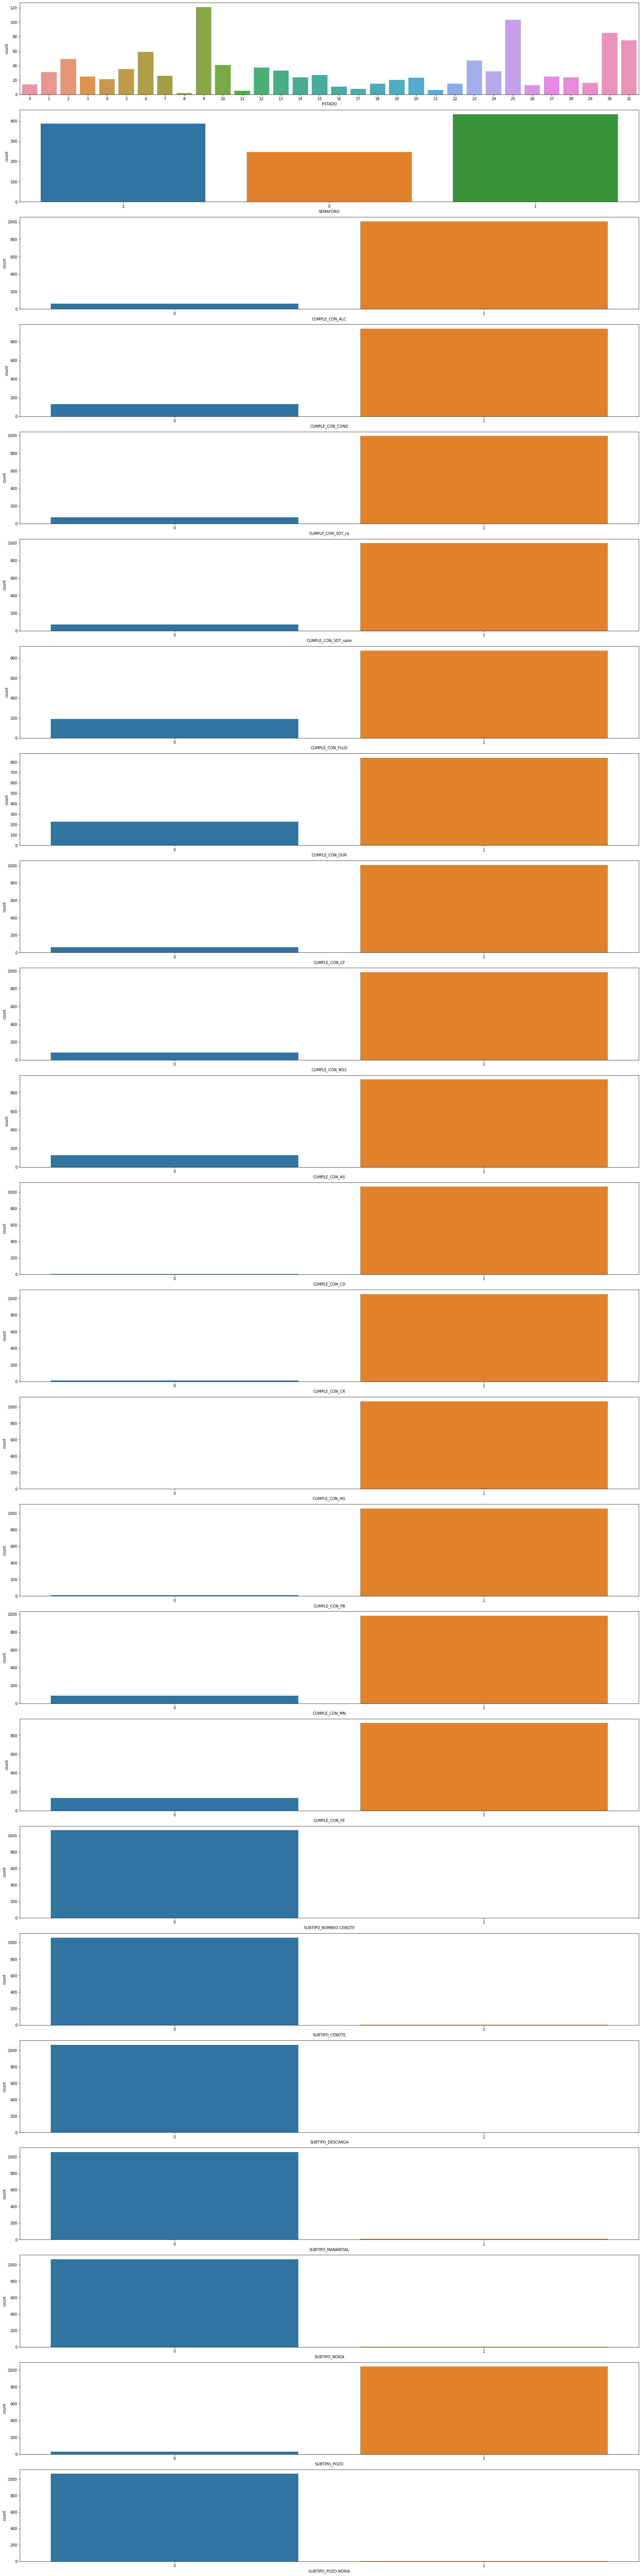

In [80]:
# Distribución de los datos
cols = df_short.columns
n_cols = len(cols)

fig, ax = plt.subplots(n_cols,1, figsize = (n_cols,n_cols*4))
fig.tight_layout(pad = 2.0)

for i, col in enumerate(cols):
  sns.countplot(data=df_short, x=col, ax = ax[i])

**Observaciones**

Si bien no es correcto definir un "tipo de distribución" para estas columnas por ser variables categóricas en su naturaleza, se observa un desbalanceo de datos en múltiples columnas (sin contar las que se hicieron One-hot Encoding)

### 4.2. Mapa

In [81]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

In [82]:
df_sub["Coordinates"] = list(zip(df_sub.LONGITUD, df_sub.LATITUD))
df_sub["Coordinates"] = df_sub["Coordinates"].apply(Point)

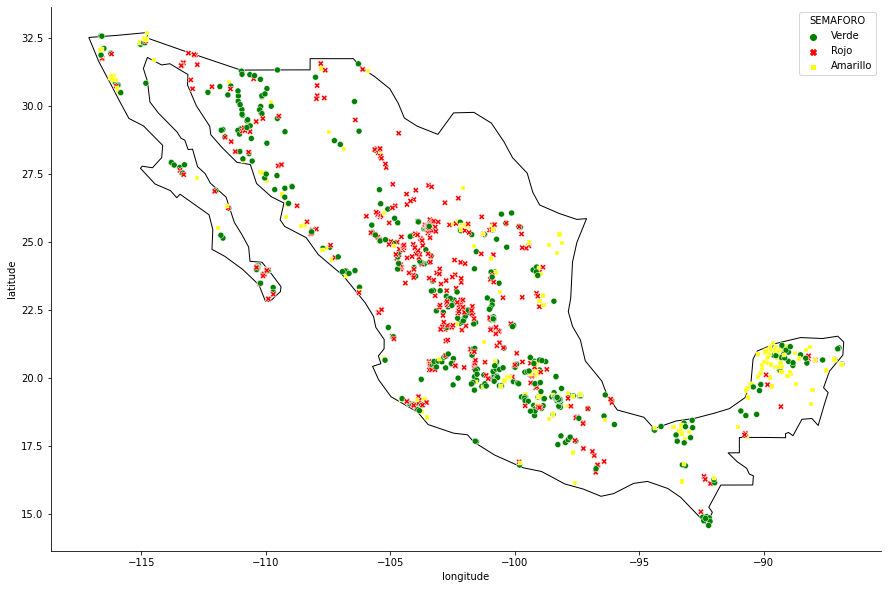

In [83]:
fig, gax = plt.subplots(figsize=(20,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

sns.scatterplot(data=df_sub, x="LONGITUD", y="LATITUD", 
                hue="SEMAFORO", palette=["g","r","yellow"],style="SEMAFORO")

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

**Observaciones**

- No existen zonas con presencia absoluta de un solo tipo de agua
- La **zona central** de México es la que más **agua no-potable** (semáforo rojo) contiene
- La **zona central-sur** de México posee una importante concentración de **agua potable**
- La zona **nor-oeste** de México posee una seguidilla de **aguas potables**

---
## 5. Modelado

Text(0, 0.5, 'wcss')

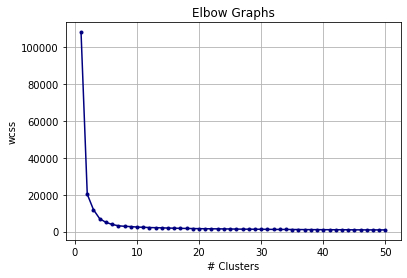

In [85]:
# METODO DEL CODO
# Definir posible mejor numero de almacenes segun criterio de inercia
wcss = []               

for i in range(1,51):
    est = KMeans(n_clusters = i)
    est.fit(df_short)
    wcss.append(est.inertia_)
    
# Gráfico
plt.title('Elbow Graphs')
plt.grid(True)

plt.plot(range(1, 51), wcss, color = 'navy', marker = '.')
plt.xlabel('# Clusters')
plt.ylabel('wcss')

**Observaciones**

Se decide utilizar **7 clusters** dado que visualmente ese es el punto en el que se estabiliza el decremento de wcss

In [86]:
# Entrenamiento del modelo (random_state = 5 para reproducibilidad)
clus = KMeans(n_clusters = 7, n_init = 20, random_state = 5)

# Etiquetado de almacén correspondiente a cada tienda
labels = clus.fit_predict(df_short)
df_sub['Clusters'] = labels


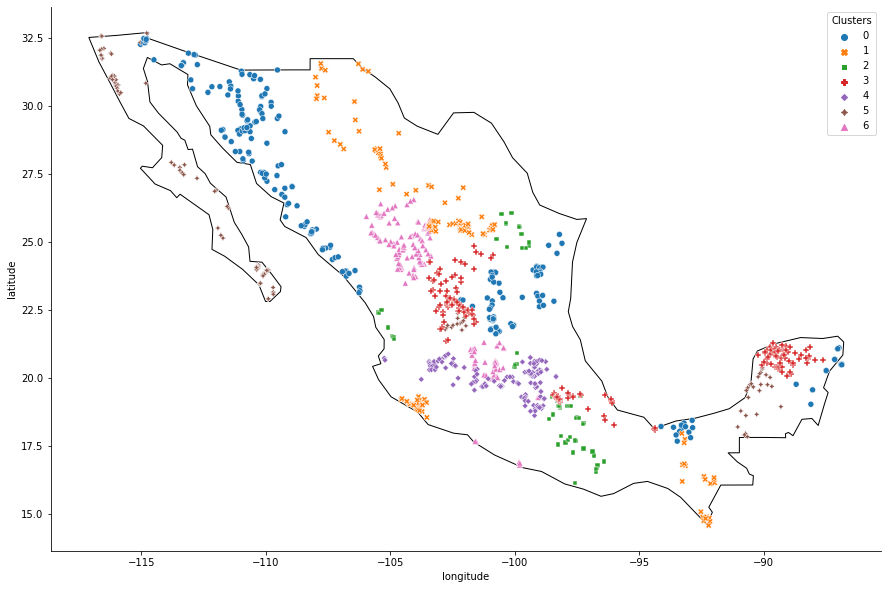

In [87]:
# Clusters formados
fig, gax = plt.subplots(figsize=(20,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

sns.scatterplot(data=df_sub, x="LONGITUD", y="LATITUD", 
                hue="Clusters", palette = "tab10", style="Clusters")

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

**Observaciones**

- Los clusters formados parecen no tener como peso único su Estado, ya que están distribuidos en distintos estados dentro de México en algunas ocasiones

In [88]:
# Separación de clusters
s0 = df_sub[df_sub['Clusters'] == 0]
s1 = df_sub[df_sub['Clusters'] == 1]
s2 = df_sub[df_sub['Clusters'] == 2]
s3 = df_sub[df_sub['Clusters'] == 3]
s4 = df_sub[df_sub['Clusters'] == 4]
s5 = df_sub[df_sub['Clusters'] == 5]
s6 = df_sub[df_sub['Clusters'] == 6]

segmentos = [s0, s1, s2, s3, s4, s5, s6]

In [98]:
# Definición de estructura de la matriz
var = ['CONTEO','CONTEO_ESTADOS','TOP_ESTADO','CONTEO_SUBTIPOS','TOP_SUBTIPO',
       'SEMAFORO_ROJO','SEMAFORO_AMARILLO','SEMAFORO_VERDE']
seg  = ['Segmento 1', 'Segmento 2', 'Segmento 3', 'Segmento 4', 'Segmento 5', 'Segmento 6']

# Creación de la matriz
M = pd.DataFrame(index = var, columns = seg)

for i, segmento in enumerate(segmentos):
    count = segmento.count()[0]
    c_est = len(segmento['ESTADO'].unique())
    t_est = segmento['ESTADO'].mode()[0]
    c_subt = len(segmento['SUBTIPO'].unique())
    t_subt = segmento['SUBTIPO'].mode()[0]
    srojo = segmento[segmento['SEMAFORO']=='Rojo'].count()[0]
    samarillo = segmento[segmento['SEMAFORO']=='Amarillo'].count()[0]
    sverde = segmento[segmento['SEMAFORO']=='Verde'].count()[0]
    
    M[f'Segmento {i + 1}'] = [count, c_est, t_est, c_subt, t_subt, 
                              srojo, samarillo, sverde]

M

,Segmento 1,Segmento 2,Segmento 3,Segmento 4,Segmento 5,Segmento 6,Segmento 7
CONTEO,235,141,72,200,132,119,169
CONTEO_ESTADOS,6,4,5,4,5,4,4
TOP_ESTADO,SONORA,COAHUILA DE ZARAGOZA,PUEBLA,YUCATAN,HIDALGO,BAJA CALIFORNIA SUR,DURANGO
CONTEO_SUBTIPOS,1,3,3,3,4,2,1
TOP_SUBTIPO,POZO,POZO,POZO,POZO,POZO,POZO,POZO
SEMAFORO_ROJO,67,68,28,57,33,36,98
SEMAFORO_AMARILLO,61,33,9,63,29,39,13
SEMAFORO_VERDE,107,40,35,80,70,44,58


### **Observaciones generales**
- El **Segmento 1** es el que **mayor número de fuentes de agua** posee, y el **Segmento 3** el que **menor** posee.
- El **Segmento 5** es el que **mayor % de fuentes Verdes** posee (60%), y el **Segmento 7** el que **menor** posee.

### **Observaciones específicas por segmento**
1. **Segmento 1** 
  - Está presente en 6 Estados diferentes
  - Su mayor presencia está en el Estado SONORA
  - Todas sus fuentes de agua son de tipo "POZO"
  - Alrededor del 40% de sus fuentes son de tipo Semáforo "VERDE"
2. **Segmento 2** 
  - Está presente en 4 Estados diferentes
  - Su mayor presencia está en el Estado COAHUILA DE ZARAGOZA
  - Tiene 3 tipos de fuentes de agua, siendo su principal las de tipo "POZO"
  - Alrededor del 50% de sus fuentes son de tipo Semáforo "ROJO"
3. **Segmento 3** 
  - Está presente en 5 Estados diferentes
  - Su mayor presencia está en el Estado PUEBLA
  - Tiene 3 tipos de fuentes de agua, siendo su principal las de tipo "POZO"
  - Alrededor del 50% de sus fuentes son de tipo Semáforo "VERDE"
4. **Segmento 4** 
  - Está presente en 4 Estados diferentes
  - Su mayor presencia está en el Estado YUCATÁN
  - Tiene 3 tipos de fuentes de agua, siendo su principal las de tipo "POZO"
  - Alrededor del 40% de sus fuentes son de tipo Semáforo "VERDE"
5. **Segmento 5** 
  - Está presente en 5 Estados diferentes
  - Su mayor presencia está en el Estado HIDALGO
  - Tiene 4 tipos de fuentes de agua, siendo su principal las de tipo "POZO"
  - Alrededor del 60% de sus fuentes son de tipo Semáforo "VERDE"
6. **Segmento 6** 
  - Está presente en 4 Estados diferentes
  - Su mayor presencia está en el Estado BAJA CALIFORNIA SUR
  - Tiene 2 tipos de fuentes de agua, siendo su principal las de tipo "POZO"
  - Alrededor del 30% de sus fuentes son de tipo Semáforo "VERDE"
7. **Segmento 7** 
  - Está presente en 4 Estados diferentes
  - Su mayor presencia está en el Estado DURANGO
  - Todas sus fuentes de agua son de tipo "POZO"
  - Alrededor del 60% de sus fuentes son de tipo Semáforo "ROJA"